#### Background

 ***   
 Sendy is the delivery partner for moving packages in Kenya. Sendy provides an app and web platform that enables (small) businesses to connect with drivers and request ondemand or scheduled package delivery services anytime, any day, 24/7. Partnership is the foundation of what we do. 
By partnering with Drivers and Businesses, we empower individuals to grow their livelihood. We do this by building a platform that is simple, transparent, and user Centric. Our goal is to be the preferred delivery partner in Africa.
 ***   

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Junior Data Analyst Data for Case Study.xlsx", sheet_name ="Querry result")
df.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Placement time t,Confirmation Day,confirmation Time2,Cancellation Day,cancellation Time T,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,Monday,5:55PM,17,NaN,NaN,Monday,17,5:56PM,9,-1.313053,36.841437,OnDemAND
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,Monday,12:26PM,12,Monday,12:27PM,Monday,12,12:28PM,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,Monday,1:21PM,13,Monday,1:21PM,Monday,13,1:47PM,16,-1.313854,36.706867,OnDemAND


In [3]:
df.isna().sum()

Personal or Business       0
Business Number         3334
Vehicle Type               0
Standard or Express        5
Platform                   0
Cancel Reason              0
Cancelled by               0
Placement Day              0
Placement Time             0
Placement time t           0
Confirmation Day        3516
confirmation Time2      3516
Cancellation Day           0
cancellation Time T        0
Cancellation Time          0
Distance (KM)              0
Pickup Lat                 0
Pickup Long                0
scheduled                  0
dtype: int64

In [4]:
dft = pd.read_excel("Junior Data Analyst Data for Case Study.xlsx", sheet_name ="Missing Cancel Reason")
dft.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,ios,NaN,Customer,1,15:23:44,1.0,16:40:47,1,16:43:50,4,-1.299370,36.822107,OnDemAND
1,Business,20680.0,Bike,Express,desktop,NaN,Staff,1,14:21:46,1.0,14:22:20,1,14:30:48,17,-1.264490,36.789303,OnDemAND
2,Business,17968.0,Bike,Express,desktop,NaN,Customer,1,15:13:20,NaN,NaN,1,15:56:34,18,-1.427056,36.961499,OnDemAND


In [5]:
dft.isna().sum()

Personal or Business      0
Business Number         169
Vehicle Type              0
Standard or Express       0
Platform                  0
Cancel Reason           329
Cancelled by              0
Placement Day             0
Placement Time            0
Confirmation Day        223
Confirmation Time       223
Cancellation Day          0
Cancellation Time         0
Distance (KM)             0
Pickup Lat                0
Pickup Long               0
scheduled                 0
dtype: int64

 ***   
 #### Question: 
Some of the data have been lost (read: we have deliberately deleted them from the data sheet). Please use the existing data set to “predict” the cancellation reason for all orders with missing data (Sheet 2). Please document your steps and method used.
 ***   

#### dealing with Nan

In [6]:
df = df.drop(['Confirmation Day', 'confirmation Time2'], axis =1)
dft = dft.drop(['Confirmation Day','Confirmation Time'], axis =1)

In [7]:
df['Standard or Express'] = df['Standard or Express'].fillna(df['Standard or Express'].mode().iloc[0])

In [8]:
df['Standard or Express']=str(df['Standard or Express'])

#Encoding the categorical feature. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
    'Placement Day', 'Cancellation Day','scheduled']] = df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
    'Placement Day','Cancellation Day','scheduled']].apply(encoder.fit_transform)

In [9]:
dft[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform','Cancelled by','scheduled']] = df[['Personal or Business','Vehicle Type', 'Standard or Express', 'Platform','Cancelled by','scheduled']].apply(encoder.fit_transform)

In [10]:
dft['cancellation Time T'] = pd.to_datetime(dft['Cancellation Time'], format='%H:%M:%S').dt.hour

In [11]:
dft['Placement time t'] = pd.to_datetime(dft['Placement Time'], format='%H:%M:%S').dt.hour

In [12]:
df.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Placement time t,Cancellation Day,cancellation Time T,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,1,NaN,0,0,1,5,0,1,5:55PM,17,1,17,5:56PM,9,-1.313053,36.841437,0
1,1,NaN,0,0,1,3,0,1,12:26PM,12,1,12,12:28PM,14,-1.318959,36.853394,0
2,0,20680.0,0,0,1,2,0,1,1:21PM,13,1,13,1:47PM,16,-1.313854,36.706867,0


In [13]:
dft.head(3)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled,cancellation Time T,Placement time t
0,1,NaN,0,0,1,NaN,0,1,15:23:44,1,16:43:50,4,-1.299370,36.822107,0,16,15
1,1,20680.0,0,0,1,NaN,0,1,14:21:46,1,14:30:48,17,-1.264490,36.789303,0,14,14
2,0,17968.0,0,0,1,NaN,0,1,15:13:20,1,15:56:34,18,-1.427056,36.961499,0,15,15


#### I want to make the columns in both similar

In [14]:
#Dropping the business Number colums #unimportant
df = df.drop(['Business Number','Placement Time','Cancellation Time'], axis = 1)
dft = dft.drop(['Business Number','Placement Time','Cancellation Time','Cancel Reason'], axis = 1)

#### Splitting and ML

In [36]:
x = df.drop('Cancel Reason', axis=1)
y = df['Cancel Reason']

In [37]:
from sklearn.preprocessing import MinMaxScaler

minsc =MinMaxScaler()
x = minsc.fit_transform(x)

dft = minsc.fit_transform(dft)

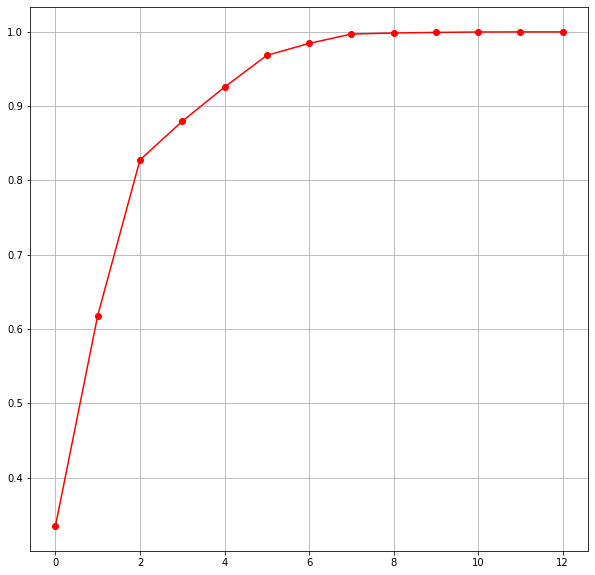

In [38]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [39]:
pca_new = PCA(n_components=6)
x = pca_new.fit_transform(x)

dft = pca_new.fit_transform(dft)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

49.583333333333336


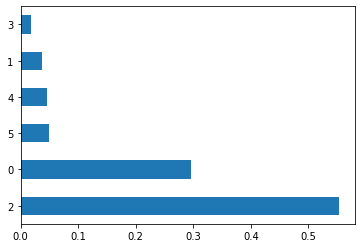

In [42]:
rf = RandomForestClassifier(n_estimators=20, random_state=33,n_jobs=-1 ,max_depth=5)
rf.fit(x_train, y_train)
rfP = rf.predict(x_test)

rfAS = accuracy_score(y_test, rfP)
rfaccuracy = rfAS*100
print (rfaccuracy)

#Feature importance
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(rf, threshold=0.1)

rf_sfm = rf_sfm.fit(x_train, y_train)

X_important_train = rf_sfm.transform(x_train)
X_important_test = rf_sfm.transform(x_test)

In [44]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

clf_importantP = clf_important.predict(X_important_test)

clf_importantAS = accuracy_score(y_test, clf_importantP)
clf_importantaccuracy = clf_importantAS*100
clf_importantaccuracy

46.302083333333336

In [ ]:
#test_important_dftest = rf_sfm.transform(dft)


#randomtarget = clf_important.predict(test_important_dftest)

#randomtarget = encoder.inverse_transform(randomtarget)
#randomtarget = pd.DataFrame(randomtarget, columns = ['Cancel Reason'])
#randomtarget.to_csv("submissionrandommin.csv", index = False) 

In [45]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
decP = dec.predict(x_test)

decAS = accuracy_score(y_test, decP)
decaccuracy = decAS*100
decaccuracy

44.739583333333336

In [46]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(x_train, y_train)
lightP = light.predict(x_test)

lightAS = accuracy_score(y_test, lightP)
lightaccuracy = lightAS*100
lightaccuracy

47.91666666666667

In [47]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knnP = knn.predict(x_test)

knnAS = accuracy_score(y_test, knnP)
knnaccuracy = knnAS*100
knnaccuracy

49.0625

In [48]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svcP = svc.predict(x_test)

svcAS = accuracy_score(y_test, svcP)
svcaccuracy = svcAS*100
svcaccuracy

48.333333333333336

In [49]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svcP = svc.predict(x_test)

svcAS = accuracy_score(y_test, svcP)
svcaccuracy = svcAS*100
svcaccuracy

48.333333333333336

In [50]:
#Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= dec , step = 1) 
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True  True False  True False]
Feature Ranking: [3 1 1 4 1 2]


In [51]:
# Transforming the data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
dec_rfe_model = dec.fit(x_train_rfe, y_train)

dec_rfeP = dec_rfe_model.predict(x_test_rfe)

dec_rfeAS = accuracy_score(y_test, dec_rfeP)
decrfeaccuracy = dec_rfeAS*100
decrfeaccuracy

45.83333333333333

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=33)
ada.fit(x_train, y_train)
adaP = ada.predict(x_test)

adaAS = accuracy_score(y_test, adaP)
adaaccuracy = adaAS*100
adaaccuracy

38.958333333333336

In [54]:
#Using Boosting model

from sklearn.ensemble import GradientBoostingClassifier

boostmodel = GradientBoostingClassifier()
boostmodel.fit(x_train, y_train)
boostmodelP = boostmodel.predict(x_test)

boostmodelAS = accuracy_score(y_test, boostmodelP)
boostaccuracy = boostmodelAS*100
boostaccuracy

49.010416666666664

In [55]:
#Hyperparameter Tuning

#RandomizedSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
rs.fit(x_train, y_train)

print_results(rs)

In [ ]:
#gridsearch
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

cvP= cv.predict(x_test)

cvAS = accuracy_score(y_test, cvP)
cvaccuracy = cvAS*100
cvaccuracy